In [5]:
import pandas as pd
from collections import defaultdict
import datetime
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

In [6]:
def read_csv_data(path):
    """
    Reads the csv file from the given path 
    and returns a pandas dataframe.

    Input => str : file path
    Output => pd.DataFrame : data from the file
    """
    assert isinstance(path, str) and path[-3:] == "csv"

    try:
        df = pd.read_csv(path)
    except:
        raise FileNotFoundError
    return df

In [10]:
CA_housing_data = read_csv_data("datasets\CAMedianPricesofExistingDetachedHomesHistoricalData.csv")
CA_housing_data.head()

,Mon-Yr,CA,Alameda,Amador,Butte,Calaveras,Contra-Costa,Del Norte,El Dorado,Fresno,...,Yolo,Yuba,Condo,LA Metro,Central Coast,Central Valley,Far North,Inland Empire,S.F. Bay Area,SoCal
0,Jan-90,"$194,952","$226,149",NaN,"$102,143",NaN,NaN,NaN,NaN,"$82,083",...,NaN,NaN,"$141,519","$203,390",NaN,NaN,NaN,NaN,"$227,366",NaN
1,Feb-90,"$196,273","$219,306",NaN,"$83,333",NaN,NaN,NaN,NaN,"$87,187",...,NaN,NaN,"$144,965","$211,024",NaN,NaN,NaN,NaN,"$234,739",NaN
2,Mar-90,"$194,856","$225,162",NaN,"$100,000",NaN,NaN,NaN,NaN,"$83,889",...,NaN,NaN,"$141,132","$209,286",NaN,NaN,NaN,NaN,"$235,337",NaN
3,Apr-90,"$196,111","$229,333",NaN,"$108,000",NaN,NaN,NaN,NaN,"$85,428",...,NaN,NaN,"$145,707","$210,302",NaN,NaN,NaN,NaN,"$233,178",NaN
4,May-90,"$195,281","$232,291",NaN,"$100,000",NaN,NaN,NaN,NaN,"$88,749",...,NaN,NaN,"$146,060","$210,148",NaN,NaN,NaN,NaN,"$235,881",NaN


In [4]:
CA_housing_data = CA_housing_data[["Area", "Year", "Quarter", "Overall_hpi"]]
CA_housing_data.head()

,Area,Year,Quarter,Overall_hpi
0,Austin-Round Rock,1999,1,100.000000
1,Austin-Round Rock,1999,2,105.047433
2,Austin-Round Rock,1999,3,105.986409
3,Austin-Round Rock,1999,4,108.343279
4,Austin-Round Rock,2000,1,113.774119


In [28]:
texas_cpi_data = read_csv_data("CPI_TX.csv")
texas_cpi_data.head()

,Year,CPI
0,1914,9.500
1,1915,9.500
2,1916,9.617
3,1917,11.092
4,1918,13.425


In [5]:
texas_areas = texas_housing_data["Area"].unique()

In [19]:
# Create a date column
texas_housing_data["Date"] = texas_housing_data["Year"].astype(str) + "-" + ((texas_housing_data["Quarter"]-1)*3 + 1).astype(str) + "-01"
texas_housing_data["Date"] = pd.to_datetime(texas_housing_data["Date"])

In [26]:
def plot_time_series(x_values, y_values, x_label="", y_label="", title=""):
    """
    Plot a time series graph for given 
    values of x and y
    """
    assert isinstance(x_values, pd.Series) and isinstance(y_values, pd.Series)
    assert x_values.shape == y_values.shape

    # Adjusting the figure size
    fig = plt.subplots(figsize=(8, 5))

    # Creating a plot
    plt.plot(x_values.to_numpy(), y_values.to_numpy())

    # Adding a plot title and customizing its font size
    plt.title(title, fontsize=20)

    # Adding axis labels and customizing their font size
    plt.xlabel(x_label, fontsize=15)
    plt.ylabel(y_label, fontsize=15)

    # Rotaing axis ticks and customizing their font size
    plt.xticks(fontsize=15)

    plt.show()

In [32]:
# Create a new data structure
texas_cpi = {}
for i, d in texas_cpi_data.iterrows():
    texas_cpi[d["Year"]] = d["CPI"]

In [43]:
def get_normalized_hpi(df, base):
    return (df["Overall_hpi"]*base)/texas_cpi[df["Year"]]

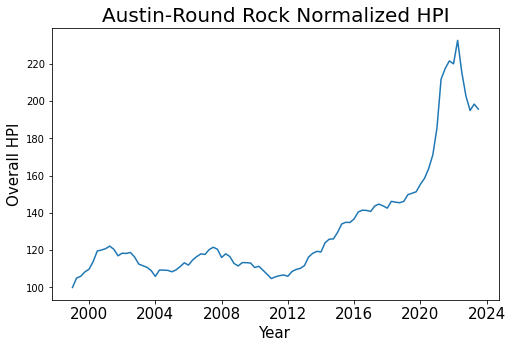

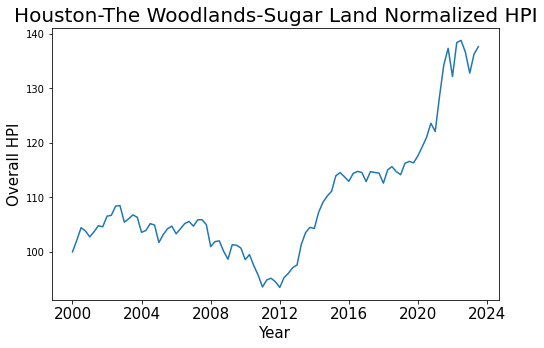

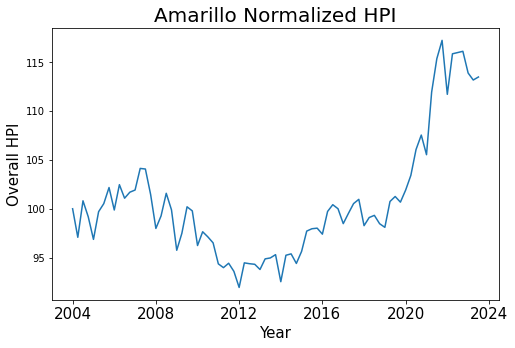

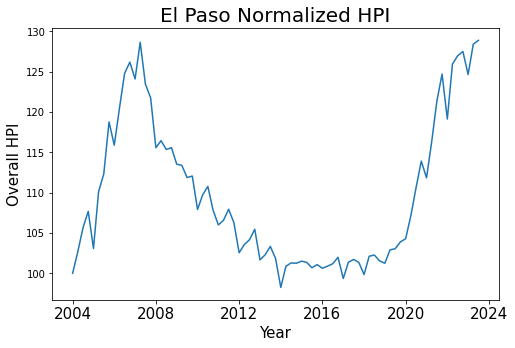

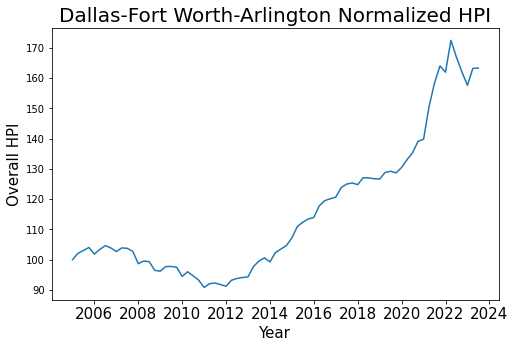

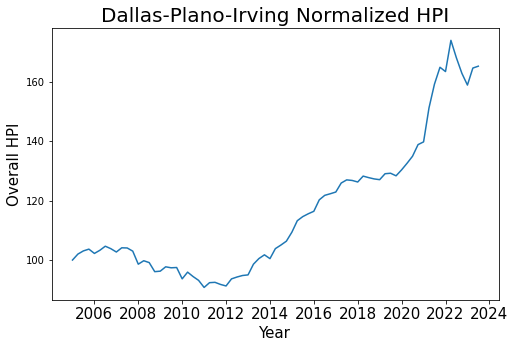

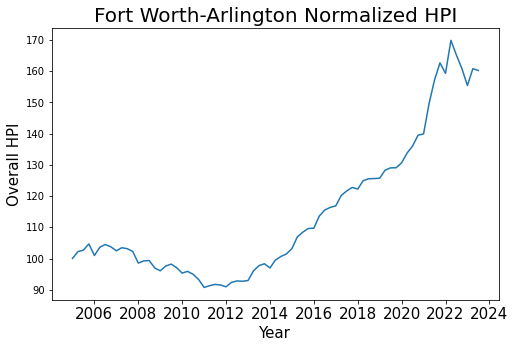

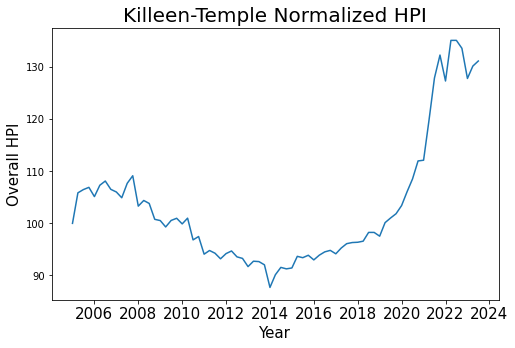

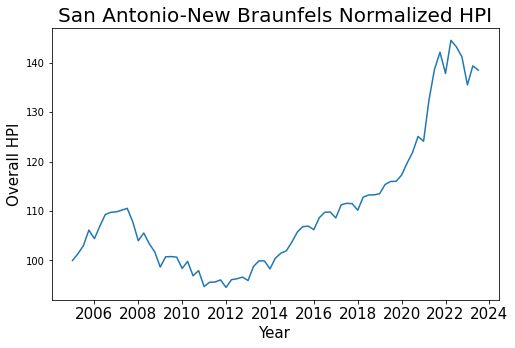

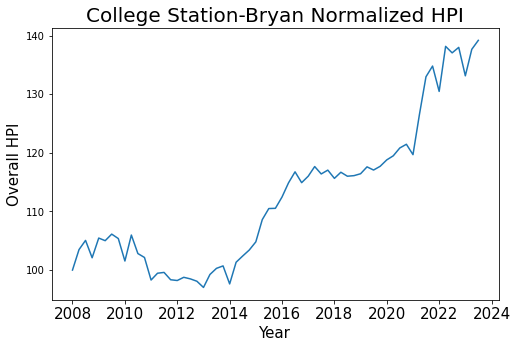

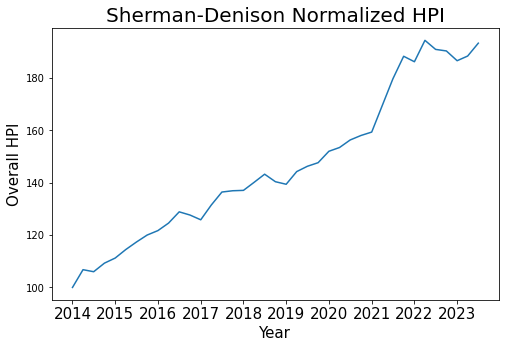

In [48]:
for area in texas_areas:
    area_df = texas_housing_data.loc[texas_housing_data["Area"] == area]
    base_cpi = texas_cpi[min(area_df["Year"])]
    area_df["Normalized_hpi"] = area_df.apply(get_normalized_hpi, axis=1, base=base_cpi)
    plot_time_series(area_df["Date"], area_df["Normalized_hpi"], "Year", "Overall HPI", area+" Normalized HPI")

In [55]:
texas_disaster_data = read_csv_data("events-TX-1980-2023.csv")
texas_disaster_data = texas_disaster_data[["Name","Year Begin","Quarter Begin","Year End","Quarter End"]]
texas_disaster_data.head()

,Name,Year Begin,Quarter Begin,Year End,Quarter End
0,Hurricane Allen (August 1980),1980,3,1980,3
1,Central/Eastern Drought/Heat Wave (Summer-Fall...,1980,2,1980,4
2,"Severe Storms, Flash Floods, Hail, Tornadoes (...",1981,2,1981,2
3,"Midwest/Southeast/Northeast Winter Storm, Cold...",1982,1,1982,1
4,Midwest/Plains/Southeast Tornadoes (April 1982),1982,2,1982,2
